In [2]:
import torch 
import torch.nn as nn
import os,glob
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from torch.utils.data import Dataset, DataLoader, WeightedRandomSampler
import torch.optim as optim

from tqdm.notebook import tqdm
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [3]:
df = pd.read_csv("./C5-C129/data_median_all/four_classes_labels_order.csv")

In [4]:
df.set_index(['Unnamed: 0'], drop=True, inplace=True)
df.index.name = None
df

,Pre: Q1,Pre: Q3,L1: Q1,L1: Q3,E1: Q1,E1: Q3,E2: Q1,E2: Q3,E3: Q1,E3: Q3,R1: Q1,R1: Q3,R2: Q1,R2: Q3,action mode
C27,0.027249,0.031506,0.029611,0.129795,0.039128,0.076689,0.026315,0.032792,0.025249,0.026433,0.025199,0.026304,0.025202,0.026295,GABAA allosteric antagonist
C28,0.026180,0.033146,0.026878,0.046242,0.031440,0.069519,0.028271,0.033913,0.026474,0.028895,0.026061,0.028682,0.024845,0.027314,GABAA allosteric antagonist
C29,0.028139,0.032934,0.030115,0.056096,0.036811,0.076576,0.028313,0.032292,0.027322,0.028915,0.027177,0.030526,0.026999,0.027695,GABAA allosteric antagonist
C34,0.028144,0.031363,0.032394,0.191891,0.051607,0.166796,0.029490,0.036784,0.028252,0.029385,0.027982,0.029160,0.027957,0.028956,GABAA allosteric antagonist
C36,0.033823,0.037328,0.037380,0.128150,0.042277,0.103168,0.034668,0.038230,0.032083,0.034245,0.031786,0.033923,0.031182,0.033820,GABAA allosteric antagonist
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WT_Control_10,0.028009,0.029890,0.030927,0.089533,0.040826,0.109981,0.029054,0.032836,0.026759,0.028354,0.026825,0.028088,0.026933,0.028652,WT_control
WT_Control_4,0.019959,0.025532,0.028686,0.157195,0.030004,0.108097,0.020531,0.028304,0.019440,0.020346,0.019728,0.020527,0.021804,0.022363,WT_control
WT_Control_5,0.023917,0.026203,0.031742,0.232738,0.094684,0.210205,0.027121,0.037384,0.024733,0.026254,0.024837,0.026551,0.025052,0.027729,WT_control
WT_Control_11,0.025712,0.028093,0.028556,0.040457,0.033479,0.147039,0.025612,0.029532,0.025584,0.026810,0.025069,0.026116,0.024893,0.027009,WT_control


In [5]:
data = df.drop("action mode", axis=1)
data

,Pre: Q1,Pre: Q3,L1: Q1,L1: Q3,E1: Q1,E1: Q3,E2: Q1,E2: Q3,E3: Q1,E3: Q3,R1: Q1,R1: Q3,R2: Q1,R2: Q3
C27,0.027249,0.031506,0.029611,0.129795,0.039128,0.076689,0.026315,0.032792,0.025249,0.026433,0.025199,0.026304,0.025202,0.026295
C28,0.026180,0.033146,0.026878,0.046242,0.031440,0.069519,0.028271,0.033913,0.026474,0.028895,0.026061,0.028682,0.024845,0.027314
C29,0.028139,0.032934,0.030115,0.056096,0.036811,0.076576,0.028313,0.032292,0.027322,0.028915,0.027177,0.030526,0.026999,0.027695
C34,0.028144,0.031363,0.032394,0.191891,0.051607,0.166796,0.029490,0.036784,0.028252,0.029385,0.027982,0.029160,0.027957,0.028956
C36,0.033823,0.037328,0.037380,0.128150,0.042277,0.103168,0.034668,0.038230,0.032083,0.034245,0.031786,0.033923,0.031182,0.033820
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WT_Control_10,0.028009,0.029890,0.030927,0.089533,0.040826,0.109981,0.029054,0.032836,0.026759,0.028354,0.026825,0.028088,0.026933,0.028652
WT_Control_4,0.019959,0.025532,0.028686,0.157195,0.030004,0.108097,0.020531,0.028304,0.019440,0.020346,0.019728,0.020527,0.021804,0.022363
WT_Control_5,0.023917,0.026203,0.031742,0.232738,0.094684,0.210205,0.027121,0.037384,0.024733,0.026254,0.024837,0.026551,0.025052,0.027729
WT_Control_11,0.025712,0.028093,0.028556,0.040457,0.033479,0.147039,0.025612,0.029532,0.025584,0.026810,0.025069,0.026116,0.024893,0.027009


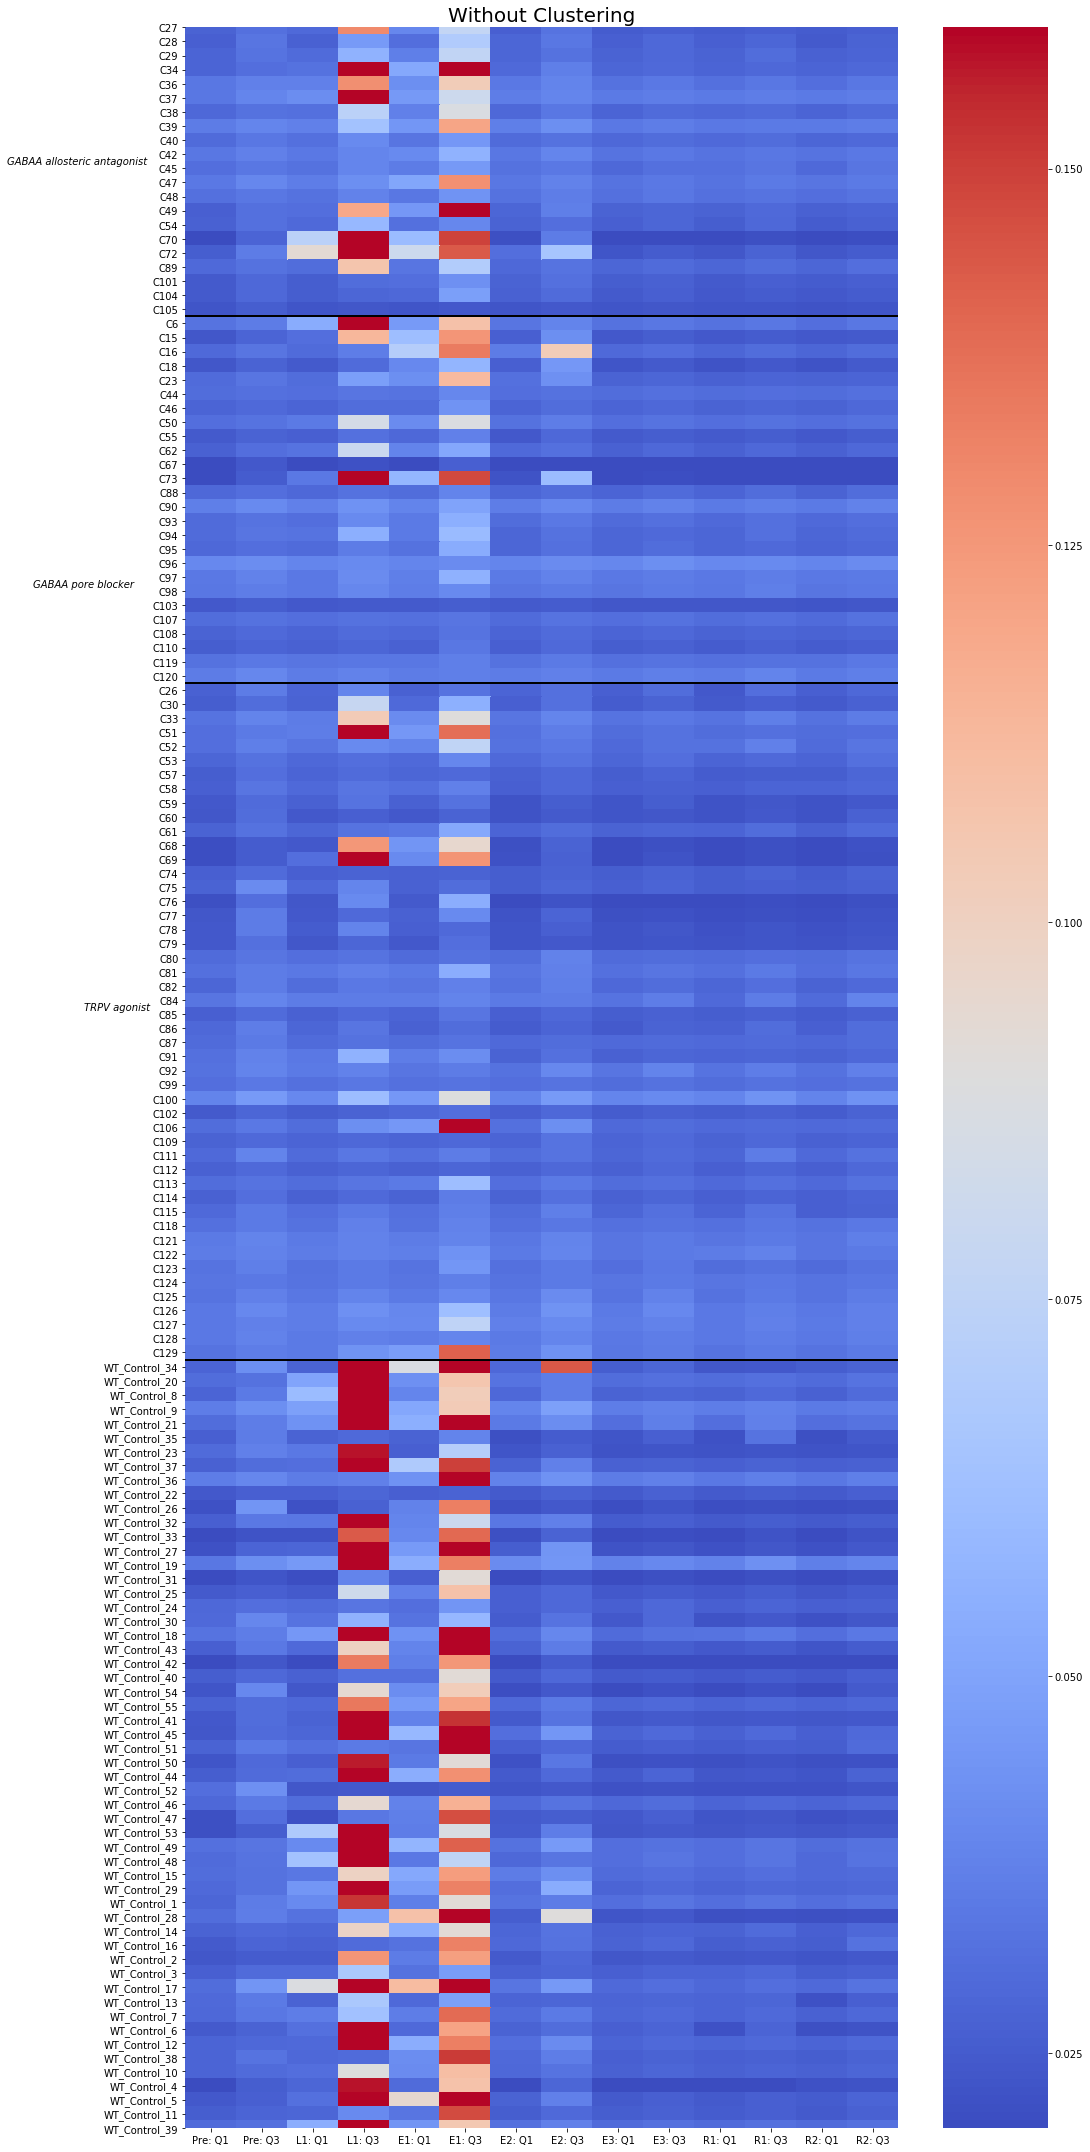

In [18]:
sns.set_context({"figure.figsize":(15,30)})
#sns.heatmap(data=all_s, cmap="coolwarm", linewidths=0.005, robust=True)
heatmap = sns.heatmap(data=data, cmap="coolwarm", robust=True)
heatmap.set_title("Without Clustering", fontsize=20)
plt.axhline(y=21, linewidth=2, color='black', linestyle='-')
plt.axhline(y=47, linewidth=2, color='black', linestyle='-')
plt.axhline(y=95, linewidth=2, color='black', linestyle='-')
plt.text(-3.5,10, "GABAA allosteric antagonist", fontsize=10, color = "black", style = "italic", weight = "light", verticalalignment='center', horizontalalignment='left', rotation=0)
plt.text(-3,40, "GABAA pore blocker", fontsize=10, color = "black", style = "italic", weight = "light", verticalalignment='center', horizontalalignment='left', rotation=0)
plt.text(-2,70, "TRPV agonist", fontsize=10, color = "black", style = "italic", weight = "light", verticalalignment='center', horizontalalignment='left', rotation=0)
plt.tight_layout()
plt.savefig("./four_classes/without_clustering.png", dpi=300)

# KMeans

In [46]:
kmeans = KMeans(n_clusters=4).fit(data)

In [47]:
data['4clusters'] = kmeans.labels_

In [48]:
data

,Pre: Q1,Pre: Q3,L1: Q1,L1: Q3,E1: Q1,E1: Q3,E2: Q1,E2: Q3,E3: Q1,E3: Q3,R1: Q1,R1: Q3,R2: Q1,R2: Q3,4clusters
C27,0.027249,0.031506,0.029611,0.129795,0.039128,0.076689,0.026315,0.032792,0.025249,0.026433,0.025199,0.026304,0.025202,0.026295,2
C28,0.026180,0.033146,0.026878,0.046242,0.031440,0.069519,0.028271,0.033913,0.026474,0.028895,0.026061,0.028682,0.024845,0.027314,0
C29,0.028139,0.032934,0.030115,0.056096,0.036811,0.076576,0.028313,0.032292,0.027322,0.028915,0.027177,0.030526,0.026999,0.027695,0
C34,0.028144,0.031363,0.032394,0.191891,0.051607,0.166796,0.029490,0.036784,0.028252,0.029385,0.027982,0.029160,0.027957,0.028956,1
C36,0.033823,0.037328,0.037380,0.128150,0.042277,0.103168,0.034668,0.038230,0.032083,0.034245,0.031786,0.033923,0.031182,0.033820,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WT_Control_10,0.028009,0.029890,0.030927,0.089533,0.040826,0.109981,0.029054,0.032836,0.026759,0.028354,0.026825,0.028088,0.026933,0.028652,2
WT_Control_4,0.019959,0.025532,0.028686,0.157195,0.030004,0.108097,0.020531,0.028304,0.019440,0.020346,0.019728,0.020527,0.021804,0.022363,2
WT_Control_5,0.023917,0.026203,0.031742,0.232738,0.094684,0.210205,0.027121,0.037384,0.024733,0.026254,0.024837,0.026551,0.025052,0.027729,1
WT_Control_11,0.025712,0.028093,0.028556,0.040457,0.033479,0.147039,0.025612,0.029532,0.025584,0.026810,0.025069,0.026116,0.024893,0.027009,3


In [49]:
data.to_csv("./four_classes/kmeans4_no_sort_values.csv")
data.sort_values("4clusters").to_csv("./four_classes/kmeans4.csv")

In [53]:
data_4kmeans = data.sort_values("4clusters")
data_4kmeans = data_4kmeans.drop("4clusters", axis=1)

In [54]:
data_4kmeans

,Pre: Q1,Pre: Q3,L1: Q1,L1: Q3,E1: Q1,E1: Q3,E2: Q1,E2: Q3,E3: Q1,E3: Q3,R1: Q1,R1: Q3,R2: Q1,R2: Q3
C92,0.032486,0.038449,0.035030,0.037904,0.033603,0.035752,0.032306,0.039663,0.033111,0.038061,0.032793,0.035995,0.032391,0.037151
C84,0.033411,0.038600,0.035439,0.035782,0.035432,0.038052,0.034827,0.035658,0.033054,0.036190,0.029510,0.035342,0.030223,0.038449
C82,0.028604,0.035390,0.030585,0.034219,0.033409,0.037303,0.032082,0.036835,0.029071,0.030671,0.028406,0.031370,0.027570,0.029621
C81,0.031920,0.035578,0.034201,0.037085,0.035155,0.054063,0.033175,0.037100,0.031999,0.033164,0.031930,0.034791,0.031093,0.033838
C80,0.029967,0.033625,0.031415,0.032952,0.030193,0.032532,0.030588,0.037503,0.030111,0.030904,0.030369,0.031200,0.030654,0.032858
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C16,0.029556,0.033269,0.030067,0.035937,0.070968,0.134057,0.035689,0.103040,0.029538,0.031228,0.028731,0.030457,0.028438,0.030470
WT_Control_28,0.030825,0.035873,0.032365,0.048218,0.108597,0.171920,0.025976,0.090587,0.022894,0.024136,0.021485,0.021839,0.021321,0.021843
WT_Control_47,0.021260,0.031251,0.021763,0.033902,0.036454,0.146758,0.024624,0.025701,0.024201,0.026105,0.022958,0.023610,0.022173,0.022804
WT_Control_26,0.022005,0.044236,0.021876,0.026790,0.037715,0.132703,0.021730,0.023870,0.021011,0.023045,0.020810,0.021662,0.020846,0.021660


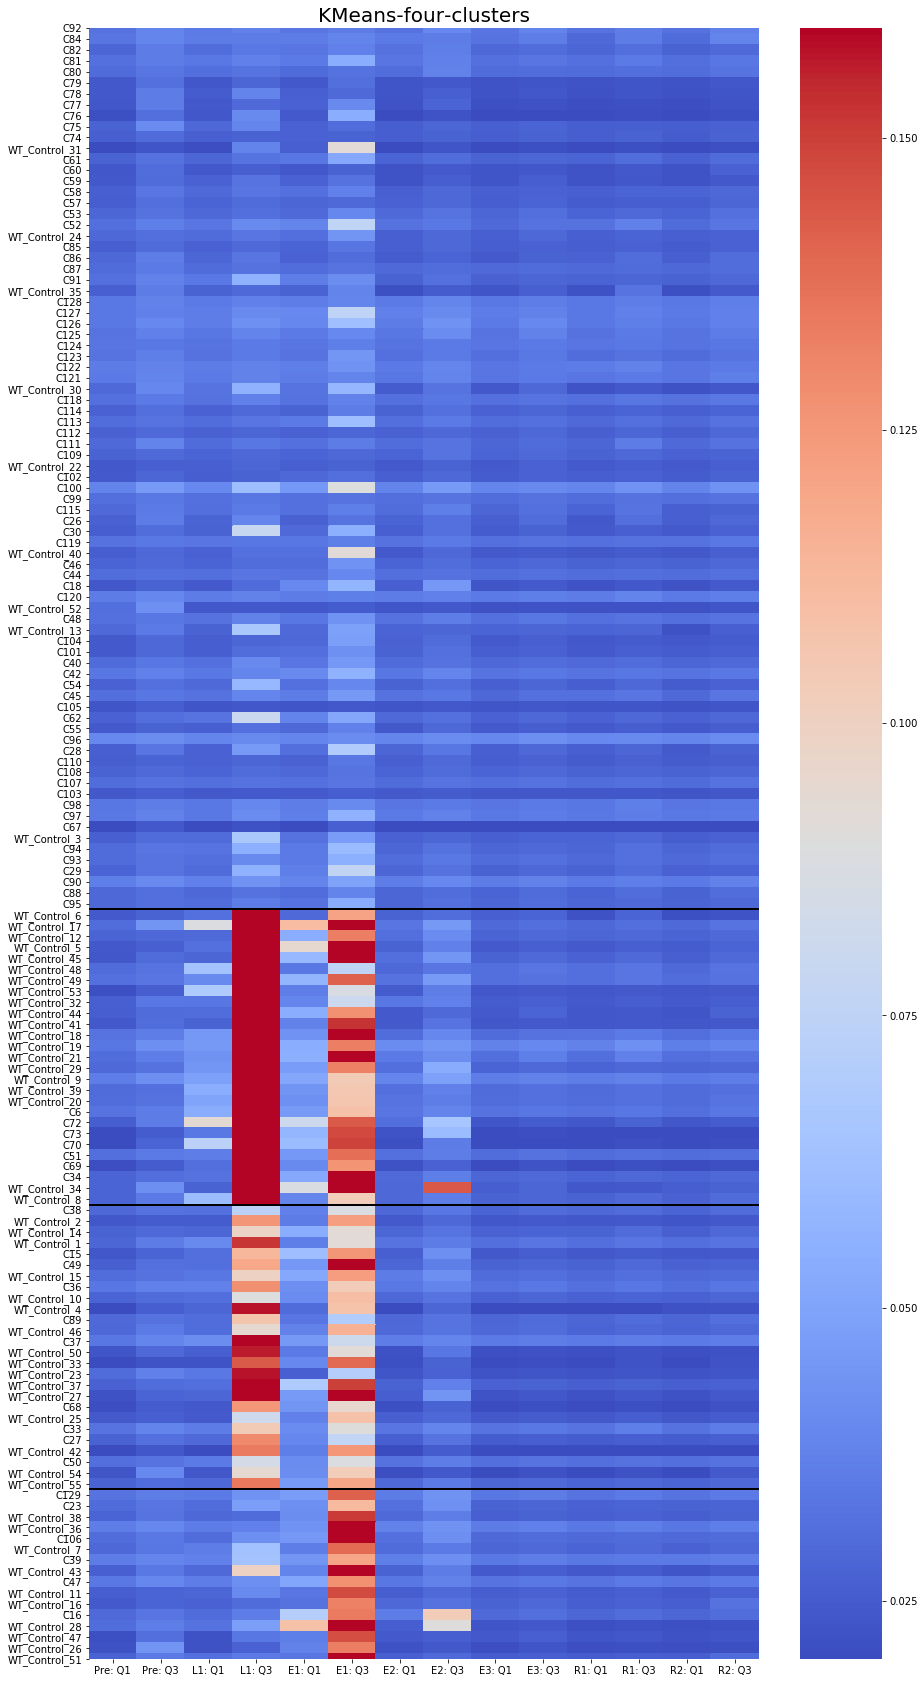

In [59]:
sns.set_context({"figure.figsize":(15,30)})
#sns.heatmap(data=all_s, cmap="coolwarm", linewidths=0.005, robust=True)
heatmap = sns.heatmap(data=data_4kmeans, cmap="coolwarm", robust=True)
heatmap.set_title("KMeans-four-clusters", fontsize=20)
plt.axhline(y=81, linewidth=2, color='black', linestyle='-')
plt.axhline(y=108, linewidth=2, color='black', linestyle='-')
plt.axhline(y=134, linewidth=2, color='black', linestyle='-')

plt.savefig("./four_classes/KMeans-four-clusters.png", dpi=300)

# Kmeans with PCA

In [61]:
data = data.drop("4clusters", axis=1)
data

,Pre: Q1,Pre: Q3,L1: Q1,L1: Q3,E1: Q1,E1: Q3,E2: Q1,E2: Q3,E3: Q1,E3: Q3,R1: Q1,R1: Q3,R2: Q1,R2: Q3
C27,0.027249,0.031506,0.029611,0.129795,0.039128,0.076689,0.026315,0.032792,0.025249,0.026433,0.025199,0.026304,0.025202,0.026295
C28,0.026180,0.033146,0.026878,0.046242,0.031440,0.069519,0.028271,0.033913,0.026474,0.028895,0.026061,0.028682,0.024845,0.027314
C29,0.028139,0.032934,0.030115,0.056096,0.036811,0.076576,0.028313,0.032292,0.027322,0.028915,0.027177,0.030526,0.026999,0.027695
C34,0.028144,0.031363,0.032394,0.191891,0.051607,0.166796,0.029490,0.036784,0.028252,0.029385,0.027982,0.029160,0.027957,0.028956
C36,0.033823,0.037328,0.037380,0.128150,0.042277,0.103168,0.034668,0.038230,0.032083,0.034245,0.031786,0.033923,0.031182,0.033820
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WT_Control_10,0.028009,0.029890,0.030927,0.089533,0.040826,0.109981,0.029054,0.032836,0.026759,0.028354,0.026825,0.028088,0.026933,0.028652
WT_Control_4,0.019959,0.025532,0.028686,0.157195,0.030004,0.108097,0.020531,0.028304,0.019440,0.020346,0.019728,0.020527,0.021804,0.022363
WT_Control_5,0.023917,0.026203,0.031742,0.232738,0.094684,0.210205,0.027121,0.037384,0.024733,0.026254,0.024837,0.026551,0.025052,0.027729
WT_Control_11,0.025712,0.028093,0.028556,0.040457,0.033479,0.147039,0.025612,0.029532,0.025584,0.026810,0.025069,0.026116,0.024893,0.027009


In [62]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(data)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

In [63]:
pca_kmeans = KMeans(n_clusters=4).fit(principalDf)

In [64]:
principalDf['pca_4clusters'] = pca_kmeans.labels_

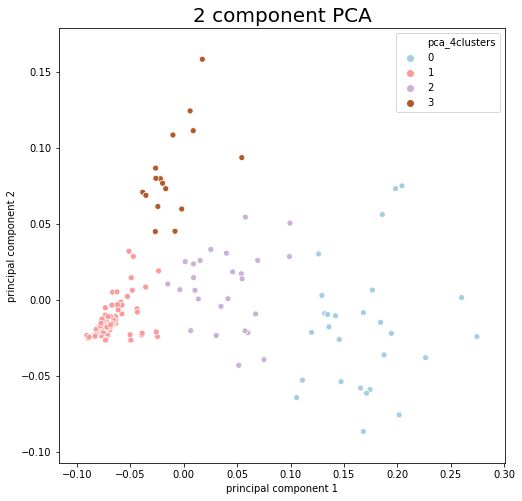

In [66]:
x_axis = principalDf['principal component 1']
y_axis = principalDf['principal component 2']
fig = plt.figure(figsize = (8,8))
sns.scatterplot(x_axis, y_axis, hue = principalDf['pca_4clusters'], palette = 'Paired')
plt.title('2 component PCA', fontsize = 20)
plt.savefig("./four_classes/scatter_kmeans_pca_4clusters", dpi=300)
plt.show()

In [68]:
data['pca_4clusters'] = pca_kmeans.labels_
data

,Pre: Q1,Pre: Q3,L1: Q1,L1: Q3,E1: Q1,E1: Q3,E2: Q1,E2: Q3,E3: Q1,E3: Q3,R1: Q1,R1: Q3,R2: Q1,R2: Q3,pca_4clusters
C27,0.027249,0.031506,0.029611,0.129795,0.039128,0.076689,0.026315,0.032792,0.025249,0.026433,0.025199,0.026304,0.025202,0.026295,2
C28,0.026180,0.033146,0.026878,0.046242,0.031440,0.069519,0.028271,0.033913,0.026474,0.028895,0.026061,0.028682,0.024845,0.027314,1
C29,0.028139,0.032934,0.030115,0.056096,0.036811,0.076576,0.028313,0.032292,0.027322,0.028915,0.027177,0.030526,0.026999,0.027695,1
C34,0.028144,0.031363,0.032394,0.191891,0.051607,0.166796,0.029490,0.036784,0.028252,0.029385,0.027982,0.029160,0.027957,0.028956,0
C36,0.033823,0.037328,0.037380,0.128150,0.042277,0.103168,0.034668,0.038230,0.032083,0.034245,0.031786,0.033923,0.031182,0.033820,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WT_Control_10,0.028009,0.029890,0.030927,0.089533,0.040826,0.109981,0.029054,0.032836,0.026759,0.028354,0.026825,0.028088,0.026933,0.028652,2
WT_Control_4,0.019959,0.025532,0.028686,0.157195,0.030004,0.108097,0.020531,0.028304,0.019440,0.020346,0.019728,0.020527,0.021804,0.022363,2
WT_Control_5,0.023917,0.026203,0.031742,0.232738,0.094684,0.210205,0.027121,0.037384,0.024733,0.026254,0.024837,0.026551,0.025052,0.027729,0
WT_Control_11,0.025712,0.028093,0.028556,0.040457,0.033479,0.147039,0.025612,0.029532,0.025584,0.026810,0.025069,0.026116,0.024893,0.027009,3


In [69]:
data.to_csv("./four_classes/kmeans4_pca_no_sort_values.csv")
data.sort_values("pca_4clusters").to_csv("./four_classes/kmeans4_pca.csv")

In [70]:
data

,Pre: Q1,Pre: Q3,L1: Q1,L1: Q3,E1: Q1,E1: Q3,E2: Q1,E2: Q3,E3: Q1,E3: Q3,R1: Q1,R1: Q3,R2: Q1,R2: Q3,pca_4clusters
C27,0.027249,0.031506,0.029611,0.129795,0.039128,0.076689,0.026315,0.032792,0.025249,0.026433,0.025199,0.026304,0.025202,0.026295,2
C28,0.026180,0.033146,0.026878,0.046242,0.031440,0.069519,0.028271,0.033913,0.026474,0.028895,0.026061,0.028682,0.024845,0.027314,1
C29,0.028139,0.032934,0.030115,0.056096,0.036811,0.076576,0.028313,0.032292,0.027322,0.028915,0.027177,0.030526,0.026999,0.027695,1
C34,0.028144,0.031363,0.032394,0.191891,0.051607,0.166796,0.029490,0.036784,0.028252,0.029385,0.027982,0.029160,0.027957,0.028956,0
C36,0.033823,0.037328,0.037380,0.128150,0.042277,0.103168,0.034668,0.038230,0.032083,0.034245,0.031786,0.033923,0.031182,0.033820,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WT_Control_10,0.028009,0.029890,0.030927,0.089533,0.040826,0.109981,0.029054,0.032836,0.026759,0.028354,0.026825,0.028088,0.026933,0.028652,2
WT_Control_4,0.019959,0.025532,0.028686,0.157195,0.030004,0.108097,0.020531,0.028304,0.019440,0.020346,0.019728,0.020527,0.021804,0.022363,2
WT_Control_5,0.023917,0.026203,0.031742,0.232738,0.094684,0.210205,0.027121,0.037384,0.024733,0.026254,0.024837,0.026551,0.025052,0.027729,0
WT_Control_11,0.025712,0.028093,0.028556,0.040457,0.033479,0.147039,0.025612,0.029532,0.025584,0.026810,0.025069,0.026116,0.024893,0.027009,3


In [76]:
data_pca_4kmeans = pd.read_csv("./four_classes/kmeans4_pca.csv")

In [78]:
data_pca_4kmeans.set_index(['Unnamed: 0'], drop=True, inplace=True)
data_pca_4kmeans.index.name = None

In [79]:
data_pca_4kmeans

,Pre: Q1,Pre: Q3,L1: Q1,L1: Q3,E1: Q1,E1: Q3,E2: Q1,E2: Q3,E3: Q1,E3: Q3,R1: Q1,R1: Q3,R2: Q1,R2: Q3,pca_4clusters
C112,0.026814,0.029832,0.027071,0.028483,0.026633,0.028672,0.026875,0.029098,0.026596,0.029152,0.026182,0.028490,0.026080,0.028989,1
C80,0.029967,0.033625,0.031415,0.032952,0.030193,0.032532,0.030588,0.037503,0.030111,0.030904,0.030369,0.031200,0.030654,0.032858,1
C111,0.029704,0.038315,0.030198,0.033858,0.031911,0.035686,0.030565,0.033081,0.028665,0.030316,0.028726,0.035604,0.029404,0.032401,1
C109,0.027440,0.029339,0.028014,0.029134,0.027902,0.029101,0.028168,0.032640,0.027999,0.029450,0.027594,0.029233,0.027094,0.028190,1
C102,0.024580,0.028605,0.025685,0.027225,0.028783,0.031398,0.026032,0.029250,0.025084,0.026992,0.025518,0.026581,0.025211,0.027348,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WT_Control_26,0.022005,0.044236,0.021876,0.026790,0.037715,0.132703,0.021730,0.023870,0.021011,0.023045,0.020810,0.021662,0.020846,0.021660,3
C23,0.029928,0.033399,0.030456,0.047883,0.042180,0.111910,0.031966,0.042784,0.027372,0.028705,0.027011,0.027907,0.027262,0.028065,3
C47,0.034417,0.039394,0.035872,0.041985,0.050932,0.127725,0.033759,0.037900,0.032682,0.034459,0.032911,0.035087,0.033414,0.035227,3
C39,0.035784,0.038918,0.036993,0.063755,0.044905,0.120595,0.036878,0.042278,0.034720,0.036003,0.034481,0.035164,0.034751,0.036014,3


In [80]:
data_pca_4kmeans = data_pca_4kmeans.drop("pca_4clusters", axis=1)

In [81]:
data_pca_4kmeans

,Pre: Q1,Pre: Q3,L1: Q1,L1: Q3,E1: Q1,E1: Q3,E2: Q1,E2: Q3,E3: Q1,E3: Q3,R1: Q1,R1: Q3,R2: Q1,R2: Q3
C112,0.026814,0.029832,0.027071,0.028483,0.026633,0.028672,0.026875,0.029098,0.026596,0.029152,0.026182,0.028490,0.026080,0.028989
C80,0.029967,0.033625,0.031415,0.032952,0.030193,0.032532,0.030588,0.037503,0.030111,0.030904,0.030369,0.031200,0.030654,0.032858
C111,0.029704,0.038315,0.030198,0.033858,0.031911,0.035686,0.030565,0.033081,0.028665,0.030316,0.028726,0.035604,0.029404,0.032401
C109,0.027440,0.029339,0.028014,0.029134,0.027902,0.029101,0.028168,0.032640,0.027999,0.029450,0.027594,0.029233,0.027094,0.028190
C102,0.024580,0.028605,0.025685,0.027225,0.028783,0.031398,0.026032,0.029250,0.025084,0.026992,0.025518,0.026581,0.025211,0.027348
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WT_Control_26,0.022005,0.044236,0.021876,0.026790,0.037715,0.132703,0.021730,0.023870,0.021011,0.023045,0.020810,0.021662,0.020846,0.021660
C23,0.029928,0.033399,0.030456,0.047883,0.042180,0.111910,0.031966,0.042784,0.027372,0.028705,0.027011,0.027907,0.027262,0.028065
C47,0.034417,0.039394,0.035872,0.041985,0.050932,0.127725,0.033759,0.037900,0.032682,0.034459,0.032911,0.035087,0.033414,0.035227
C39,0.035784,0.038918,0.036993,0.063755,0.044905,0.120595,0.036878,0.042278,0.034720,0.036003,0.034481,0.035164,0.034751,0.036014


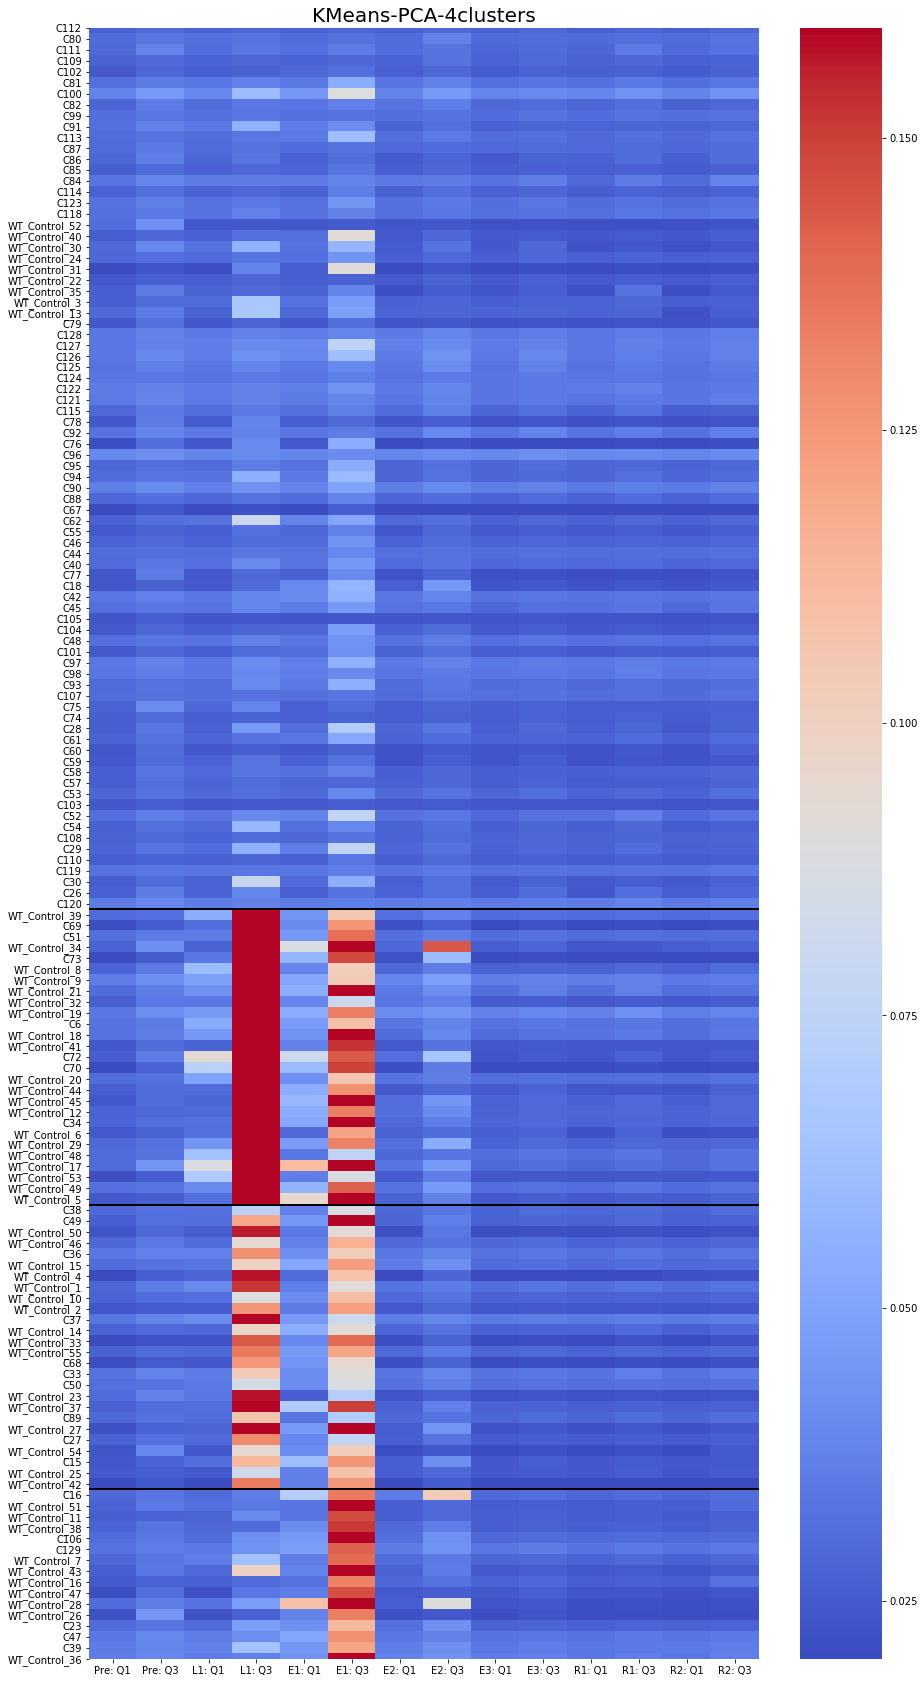

In [83]:
sns.set_context({"figure.figsize":(15,30)})
#sns.heatmap(data=all_s, cmap="coolwarm", linewidths=0.005, robust=True)
heatmap = sns.heatmap(data=data_pca_4kmeans, cmap="coolwarm", robust=True)
heatmap.set_title("KMeans-PCA-4clusters", fontsize=20)
plt.axhline(y=81, linewidth=2, color='black', linestyle='-')
plt.axhline(y=108, linewidth=2, color='black', linestyle='-')
plt.axhline(y=134, linewidth=2, color='black', linestyle='-')

plt.savefig("./four_classes/KMeans-PCA-four-clusters.png", dpi=300)